In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

/tmp/ipykernel_25421/1028975186.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
/home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = 'mall_dataset'

path_sets = os.path.join(
    root,
    'frames'
)

img_paths = []
for path in [path_sets]:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [4]:
model = CSRNet()

/home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
model = model.cpu()

In [10]:
best_model = 'PartAmodel_best.pth.tar'

checkpoint = torch.load(
    os.path.join(
        'trained_models',
        best_model
    ),
    map_location=torch.device('cpu')
)


In [11]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [14]:
mae = 0
total_images = len(img_paths)

for i, img_path in enumerate(img_paths):
    img = 255.0 * F.to_tensor(Image.open(img_path).convert('RGB'))
    img[0, :, :] -= 92.8207477031
    img[1, :, :] -= 95.2757037428
    img[2, :, :] -= 104.877445883
    img = img.cpu()

    gt_file = h5py.File(img_path.replace('.jpg', '.h5').replace('frames', 'ground_truth'), 'r')
    groundtruth = np.asarray(gt_file['density'])

    output = model(img.unsqueeze(0))

    absolute_difference = np.abs(output.detach().cpu().sum().numpy() - np.sum(groundtruth))
    mae += absolute_difference

    print(f"Processed image {i + 1}/{total_images} - MAE: {absolute_difference}")

average_mae = mae / total_images
print(f"\nAverage MAE: {average_mae}")


Processed image 1/2000 - MAE: 136.14059448242188
Processed image 2/2000 - MAE: 124.7281494140625
Processed image 3/2000 - MAE: 158.32437133789062
Processed image 4/2000 - MAE: 142.27352905273438
Processed image 5/2000 - MAE: 132.20803833007812
Processed image 6/2000 - MAE: 120.39299774169922
Processed image 7/2000 - MAE: 77.75067138671875
Processed image 8/2000 - MAE: 124.6279067993164
Processed image 9/2000 - MAE: 119.8526382446289
Processed image 10/2000 - MAE: 69.01676940917969
Processed image 11/2000 - MAE: 151.46461486816406
Processed image 12/2000 - MAE: 133.64053344726562
Processed image 13/2000 - MAE: 105.65585327148438
Processed image 14/2000 - MAE: 224.47763061523438
Processed image 15/2000 - MAE: 141.81065368652344
Processed image 16/2000 - MAE: 163.5562286376953
Processed image 17/2000 - MAE: 159.39523315429688
Processed image 18/2000 - MAE: 147.3007354736328
Processed image 19/2000 - MAE: 125.57585144042969
Processed image 20/2000 - MAE: 111.68678283691406
Processed image 

In [16]:
output = model(img.unsqueeze(0))

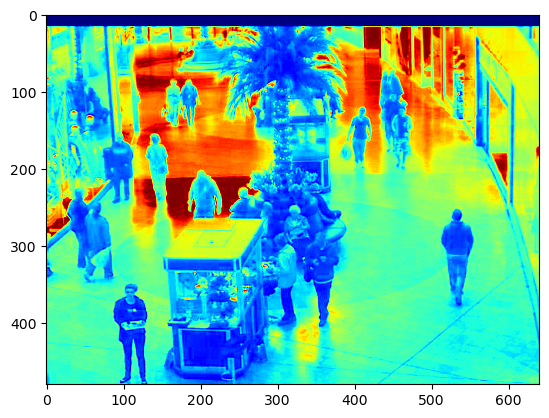

In [23]:
plt.imshow(img[2].detach().cpu().numpy(), cmap=CM.jet)

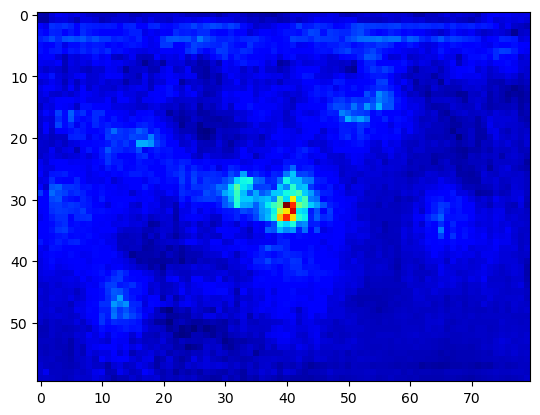

In [18]:
plt.imshow(output.detach().cpu().squeeze().numpy(), cmap=CM.jet)

In [24]:
output.detach().cpu().squeeze().numpy().sum()

185.46361